### ENSEMBLE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [ ]:
# Dado el escaso exito de minar los datos, voy a volver atrás y coger los datos en bruto que tenia en V0

In [10]:
df=pd.read_csv('./training set values.csv', sep=',')

In [11]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [12]:
df_target = pd.read_csv('training set labels.csv')
df = pd.merge(df, df_target)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [14]:
variables_categoricas = [
    'funder',
    'installer',
    'wpt_name',
    'basin',
    'subvillage',
    'region',
    'lga',
    'ward',
    'public_meeting',
    'recorded_by',
    'scheme_management',
    'scheme_name',
    'permit',
    'extraction_type',
    'extraction_type_group',
    'extraction_type_class',
    'management',
    'management_group',
    'payment',
    'payment_type',
    'water_quality',
    'quality_group',
    'quantity',
    'quantity_group',
    'source',
    'source_type',
    'source_class',
    'waterpoint_type',
    'waterpoint_type_group'
]

In [15]:
# Copio y pego gran parte del codigo de V0 para el label encoder
df3 = df
le = LabelEncoder()
for variable in variables_categoricas:
    df3[variable] = le.fit_transform(df3[variable])
pd.set_option('display.max_columns', None)

In [16]:
df3


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1368,1390,1518,34.938093,-9.856322,37398,0,...,6,2,1,1,8,6,0,1,1,functional
1,8776,0.0,2013-03-06,469,1399,545,34.698766,-2.147466,37194,0,...,6,2,2,2,5,3,1,1,1,functional
2,34310,25.0,2013-02-25,825,686,2048,37.460664,-3.821329,14572,0,...,6,2,1,1,0,1,1,2,1,functional
3,67743,0.0,2013-01-28,1740,263,1852,38.486161,-11.155298,37284,0,...,6,2,0,0,3,0,0,2,1,non functional
4,19728,0.0,2011-07-13,20,0,119,31.130847,-1.825359,35528,0,...,6,2,3,3,5,3,1,1,1,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,436,1210,201,37.169807,-3.253847,513,0,...,6,2,1,1,8,6,0,1,1,functional
59396,27263,4700.0,2011-05-07,177,1212,265,35.249991,-9.070629,24074,0,...,6,2,1,1,6,4,1,1,1,functional
59397,37057,0.0,2011-04-11,1896,0,2145,34.017087,-8.750434,27926,0,...,1,1,1,1,3,0,0,4,3,functional
59398,31282,0.0,2011-03-08,884,0,1213,35.861315,-6.378573,29693,0,...,6,2,2,2,7,5,0,4,3,functional


In [17]:
del df3['date_recorded'] # para que no de problemas el datatime
df3

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,1368,1390,1518,34.938093,-9.856322,37398,0,1,...,6,2,1,1,8,6,0,1,1,functional
1,8776,0.0,469,1399,545,34.698766,-2.147466,37194,0,4,...,6,2,2,2,5,3,1,1,1,functional
2,34310,25.0,825,686,2048,37.460664,-3.821329,14572,0,5,...,6,2,1,1,0,1,1,2,1,functional
3,67743,0.0,1740,263,1852,38.486161,-11.155298,37284,0,7,...,6,2,0,0,3,0,0,2,1,non functional
4,19728,0.0,20,0,119,31.130847,-1.825359,35528,0,4,...,6,2,3,3,5,3,1,1,1,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,436,1210,201,37.169807,-3.253847,513,0,5,...,6,2,1,1,8,6,0,1,1,functional
59396,27263,4700.0,177,1212,265,35.249991,-9.070629,24074,0,6,...,6,2,1,1,6,4,1,1,1,functional
59397,37057,0.0,1896,0,2145,34.017087,-8.750434,27926,0,6,...,1,1,1,1,3,0,0,4,3,functional
59398,31282,0.0,884,0,1213,35.861315,-6.378573,29693,0,6,...,6,2,2,2,7,5,0,4,3,functional


In [44]:
#df_target['status_group'].replace([0, 1, 2], ['non functional', 'functional needs repair', 'functional'], inplace=True)
df3['status_group'].replace(['non functional', 'functional needs repair', 'functional'], [0, 1, 2], inplace=True)
df3

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,1368,1390,1518,34.938093,-9.856322,37398,0,1,...,6,2,1,1,8,6,0,1,1,2
1,8776,0.0,469,1399,545,34.698766,-2.147466,37194,0,4,...,6,2,2,2,5,3,1,1,1,2
2,34310,25.0,825,686,2048,37.460664,-3.821329,14572,0,5,...,6,2,1,1,0,1,1,2,1,2
3,67743,0.0,1740,263,1852,38.486161,-11.155298,37284,0,7,...,6,2,0,0,3,0,0,2,1,0
4,19728,0.0,20,0,119,31.130847,-1.825359,35528,0,4,...,6,2,3,3,5,3,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,436,1210,201,37.169807,-3.253847,513,0,5,...,6,2,1,1,8,6,0,1,1,2
59396,27263,4700.0,177,1212,265,35.249991,-9.070629,24074,0,6,...,6,2,1,1,6,4,1,1,1,2
59397,37057,0.0,1896,0,2145,34.017087,-8.750434,27926,0,6,...,1,1,1,1,3,0,0,4,3,2
59398,31282,0.0,884,0,1213,35.861315,-6.378573,29693,0,6,...,6,2,2,2,7,5,0,4,3,2


### Muestreo estratificado

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('status_group',axis=1),
                                                    df3.status_group,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = df3.status_group)

### Modelos

In [46]:
model1 = RandomForestClassifier().fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [63]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2, average='weighted'))
    print('recall')
    print(recall_score(y1, y2, average='weighted'))
    print('f1')
    print(f1_score(y1, y2, average='weighted'))
    #false_positive_rate, recall, thresholds = roc_curve(y1, y2)    # no soporta multi clase
    #roc_auc = auc(false_positive_rate, recall)
    #print('AUC')
    #print(roc_auc)
    #plt.plot(false_positive_rate, recall, 'b')
    #plt.plot([0, 1], [0, 1], 'r--')
    #plt.title('AUC = %0.2f' % roc_auc)  

In [64]:
saca_metricas(y_test, y_pred)

matriz de confusión
[[3602   64  899]
 [ 122  310  431]
 [ 530  143 5779]]
accuracy
0.8157407407407408
precision
0.810413802718308
recall
0.8157407407407408
f1
0.8094081450114042


In [65]:
model2 = XGBClassifier().fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [66]:
saca_metricas(y_test, y_pred)

matriz de confusión
[[3400   35 1130]
 [ 138  231  494]
 [ 534   93 5825]]
accuracy
0.795959595959596
precision
0.7922814057825505
recall
0.795959595959596
f1
0.78514880809316


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

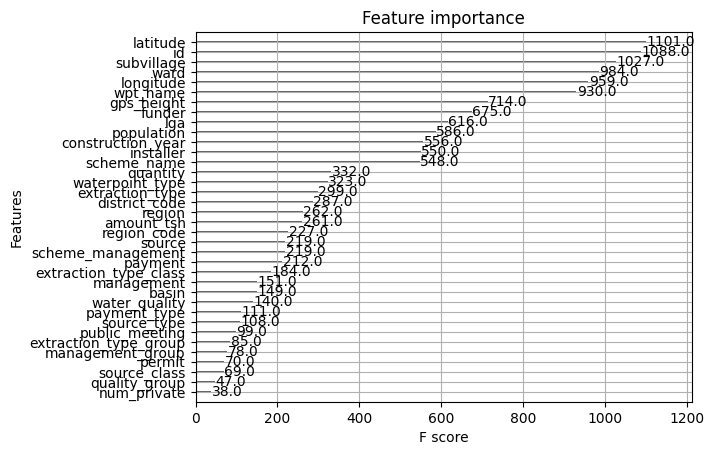

In [67]:
xgboost.plot_importance(model2)
# Segín los datos que hemos ido viendo este grafico no representa la importancia de las columnas. Quizás el orden inverso